Notebook to plot global mean precipitation rate time series and Hovmoeller diagrams (time vs longitude) of precipitation rate averaged over a latitudinal band

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Hovmoeller_plot import hovmoller_plot
from aqua import Reader, catalogue
#catalogue();

Read data from LRA and plot global mean precipitation rate

Text(0.5, 1.0, 'global mean precipitation rate')

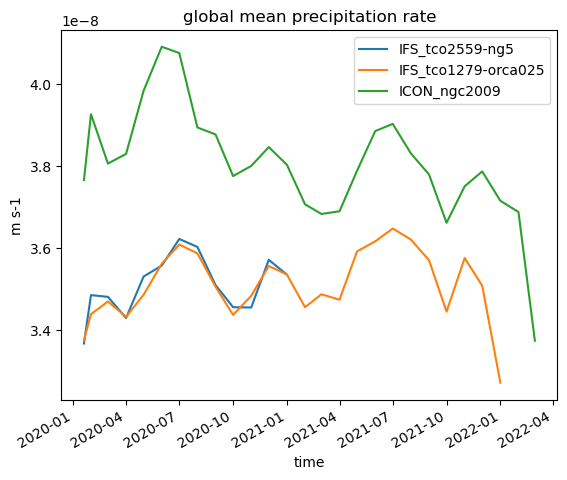

In [3]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon" #Low Resolution Archive

data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve()["tprate"]

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        reader.fldmean(data[(model, exp)]).plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("m s-1")
plt.title("global mean precipitation rate")

Now produce Hovmoeller plot of tropical precipitation

tprate [m s**-1]
tprate [m s**-1]
tprate [m s**-1]


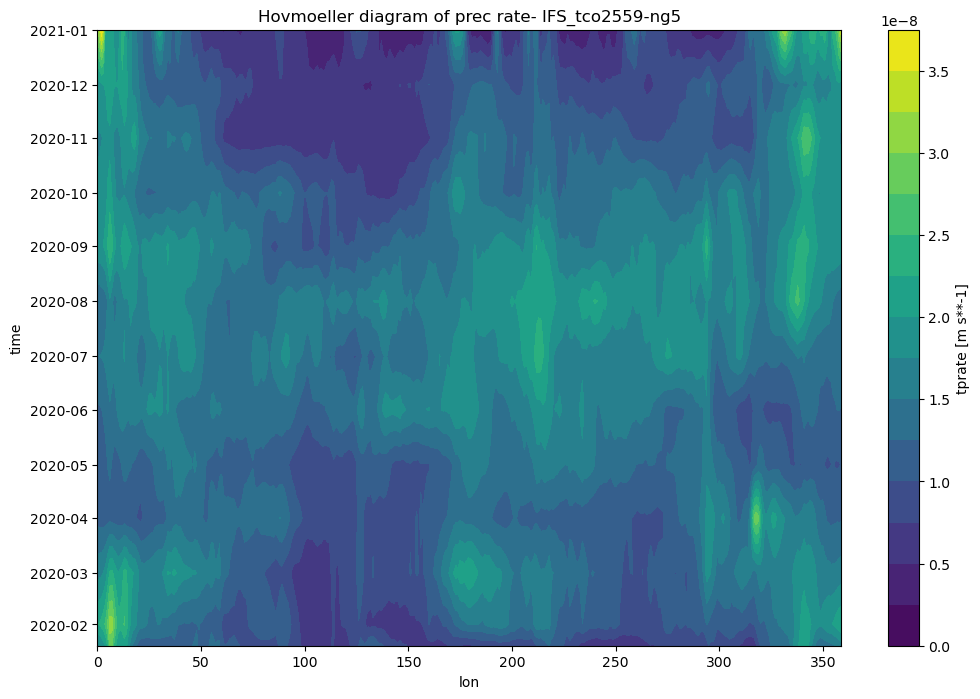

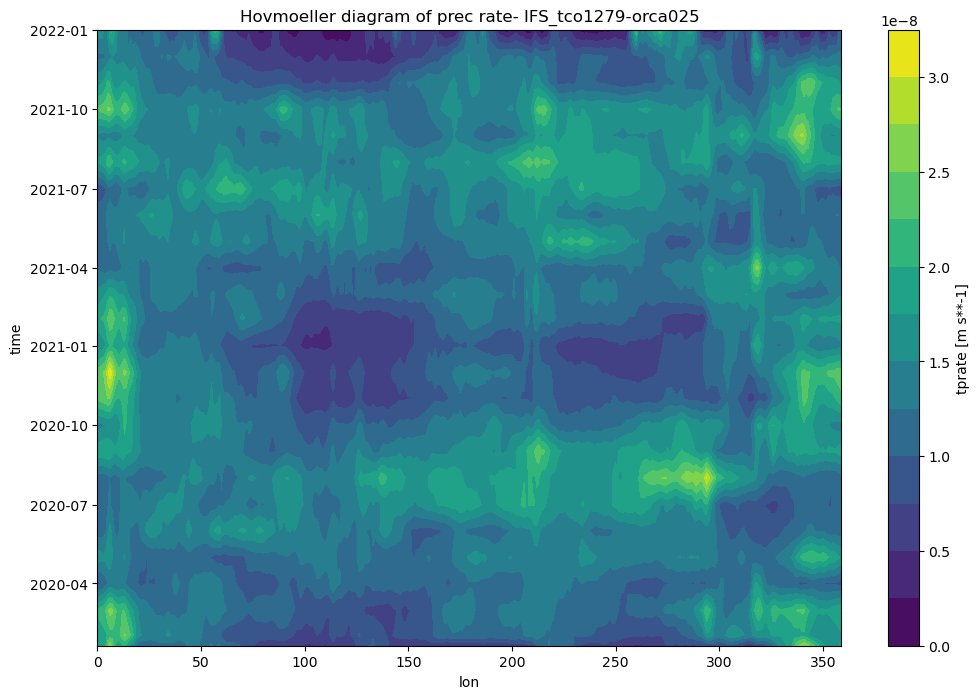

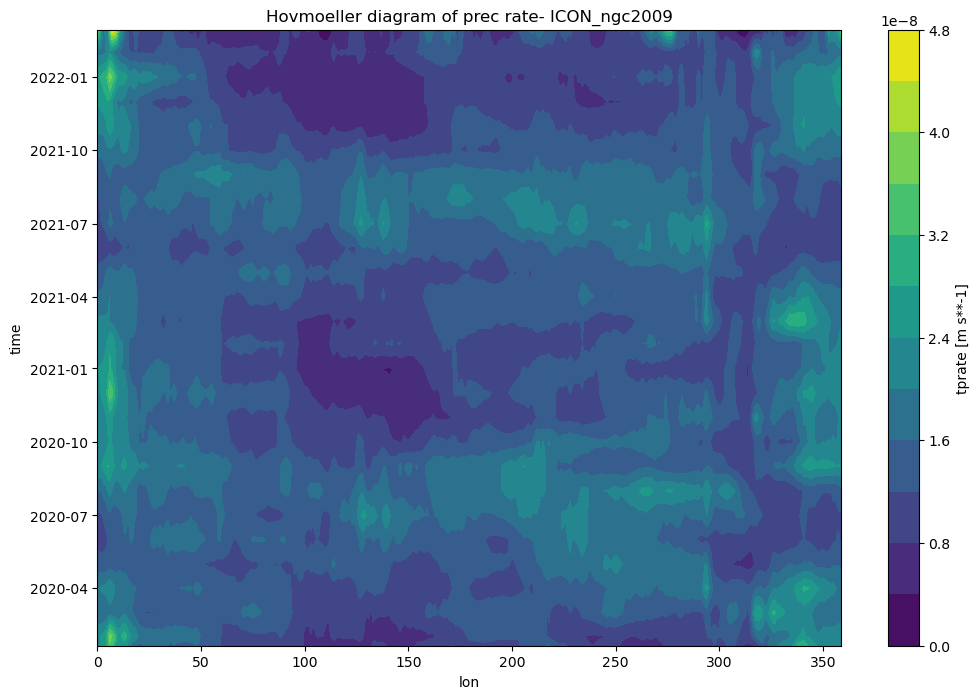

In [5]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

data = {}

#set the latitudinal belt for averaging
lat_N= 30 #northern latitude
lat_S=-30 #southern latitude
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve()["tprate"]
        infile = data[(model, exp)].isel(lat=range(lat_S,lat_N))
        hovmoller_plot(infile,dim='lat',invert_axis=True,contour=True,title=f"Hovmoeller diagram of prec rate- {model}_{exp}",levels=13)